# Zadanie 2
W zadaniu tym wykorzystamy wersję binarną PSO, który zamiast poruszać cząstkami
płynnie po ciągłej przestrzeni zmiennoprzecinkowej, będzie powodował skoki cząstek
na pozycje 0 lub 1 na współrzędnych. Innymi słowy, cząstki mogą być tylko na dwóch
współrzędnych: 0 i 1, na wszystkich możliwych osiach. Trudność tego problemu jest
„odwrócona” w stosunku do poprzedniej wersji:
*  Przestrzeń liczb rzeczywistych: mniej osi/wymiarów, nieskończenie wiele
współrzędnych
* Przestrzeń dwubitowa {0,1}: dużo osi/wymiarów, tylko dwie możliwe wartości

a) Skopiuj tablicę S z 15 liczbami z partition problem do Pythona. Skopiuj też
funkcję fitness z algorytmu genetycznego, którą będziemy chcieli minimalizować
(tym razem nie przez ewolucję, tylko przez rój cząstek).
Uwaga: ponieważ minimalizujemy funkcję fitness (w genetycznym
maksymalizowaliśmy), to usuń w niej minus przed numpy.abs. Usuń też
niepotrzebne solution_idx z argumentów.

In [1]:
import numpy

S = [1, 2, 3, 6, 10, 17, 25, 29, 30, 41, 51, 60, 70, 79, 80]

def fitness_func(solution):
 sum1 = numpy.sum(solution * S)
 solution_invert = 1 - solution
 sum2 = numpy.sum(solution_invert * S)
 fitness = numpy.abs(sum1-sum2)
 return fitness
fitness_function = fitness_func

b) Ustaw opcje do przekazania:

In [2]:
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9, 'k':2, 'p':1}

k – oznaczający wielkość
sąsiedztwa, 

p – oznaczający metrykę odległości do szukania sąsiadów.
Wykorzystywane jest tutaj podejście geograficzne sąsiedztwa

c) Inicjujemy optymalizator BinaryPSO z odpowiednimi argumentami.
Uruchamiamy go dla funkcji f i zwracamy wyniki.

In [4]:
pip install pyswarms

     |████████████████████████████████| 104 kB 5.3 MB/s 


In [9]:
import pyswarms as ps
from pyswarms.utils.plotters import plot_cost_history
import numpy as np

In [10]:
import math

def endurance(x):
  return -(math.exp(-2*(x[1]-math.sin(x[0]))**2)+math.sin(x[2]*x[3])+math.cos(x[4]*x[5]))

def f(x):
  n_particles=x.shape[0]
  j=[endurance(x[i])for i in range(n_particles)]
  return np.array(j)

2022-04-05 19:03:50,800 - pyswarms.discrete.binary - INFO - Optimize for 30 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9, 'k': 2, 'p': 1}
pyswarms.discrete.binary: 100%|██████████|30/30, best_cost=-2.84
2022-04-05 19:03:50,913 - pyswarms.discrete.binary - INFO - Optimization finished | best cost: -2.8414709848078967, best pos: [0 0 1 1 1 0 0 1 0 1 1 1 0 1 1]


NameError: ignored

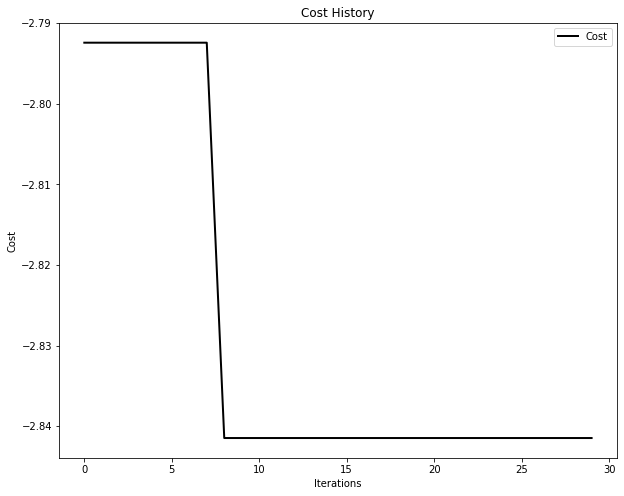

In [11]:
optimizer = ps.discrete.BinaryPSO(n_particles=10, dimensions=15,
options=options)
optimizer.optimize(f, iters=30, verbose=True)
cost_history = optimizer.cost_history
plot_cost_history(cost_history)
plt.show()